## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/AIML/Computer Vision/Dog Bread_compVision/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as test:
  test.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as sample:
  sample.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as label:
  label.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read c file using pandas

In [0]:
labels_file=pd.read_csv('/content/labels.csv')

In [9]:
display('shape:',labels_file.shape,labels_file.head())

'shape:'

(10222, 2)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [10]:
labels_file['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
komondor                 67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [0]:
labels_en_df = pd.get_dummies(labels_file.breed)

In [12]:
labels_en_df.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128

x_train = []
y_train = []

In [14]:
from tqdm import tqdm
import cv2

for f, img in tqdm(labels_file.values):
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img,(img_rows,img_cols))
  x_train.append(train_img_resize)
  y_train.append(img)

100%|██████████| 10222/10222 [00:27<00:00, 375.81it/s]


In [15]:
y_train[2]

'pekinese'

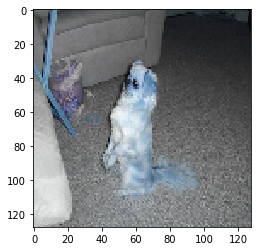

In [16]:
plt.imshow(x_train[2])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [17]:
x_train[1].shape

(128, 128, 3)

In [18]:
x_train_conv = np.array(x_train)
print(x_train_conv.shape)

(10222, 128, 128, 3)


In [0]:
x_train_conv =  x_train_conv.astype("float32") / 255

In [20]:
y_train_class = pd.get_dummies(y_train)
y_train_class.shape

(10222, 120)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split

### Split the Dataset
X_train, X_val, y_train, y_val = train_test_split(x_train_conv, y_train_class, test_size=0.3, random_state=1)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img_df=pd.read_csv('/content/sample_submission.csv',usecols=[0])

In [23]:
test_img_df.head()

,id
0,000621fb3cbb32d8935728e48679680e
1,00102ee9d8eb90812350685311fe5890
2,0012a730dfa437f5f3613fb75efcd4ce
3,001510bc8570bbeee98c8d80c8a95ec1
4,001a5f3114548acdefa3d4da05474c2e


Run the below code to load the test image files in x_test_feature

In [24]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img_df.id): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:27<00:00, 383.04it/s]


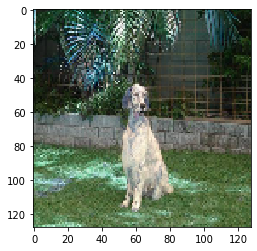

In [25]:
plt.imshow(x_test_feature[2])

Normalize the test data and convert it into 4 dimensions

In [26]:
x_test_conv = np.array(x_test_feature)
x_test_conv.shape

(10357, 128, 128, 3)

In [0]:
x_test_conv =  x_test_conv.astype("float32") / 255

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K
import vis
from keras.models import Model

Using TensorFlow backend.


In [29]:
model_conv = Sequential()

# 1st Conv Layer
model_conv.add(Conv2D(32, (5, 3), activation='relu', input_shape=(128, 128, 3)))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))

# 2nd Conv Layer
model_conv.add(Conv2D(32, (3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))

# Fully Connected Layer
model_conv.add(Flatten())
model_conv.add(Dense(256, activation='relu'))

# Dense Layer
model_conv.add(Dense(120, activation='softmax'))

### Use batch_size = 128 and epochs = 10 and execute the model

In [30]:
model_conv.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [31]:
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 126, 32)      1472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 40, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1384704   
_________________________________________________________________
dense_2 (Dense)              (None, 120)              

In [32]:
%%time 
model_conv.fit(X_train, y_train, batch_size=128, epochs=10, verbose=2,
               validation_data=(X_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7155 samples, validate on 3067 samples
Epoch 1/10





 - 16s - loss: 4.7885 - acc: 0.0091 - val_loss: 4.7885 - val_acc: 0.0082
Epoch 2/10
 - 2s - loss: 4.7839 - acc: 0.0103 - val_loss: 4.7869 - val_acc: 0.0082
Epoch 3/10
 - 2s - loss: 4.7813 - acc: 0.0109 - val_loss: 4.7860 - val_acc: 0.0104
Epoch 4/10
 - 2s - loss: 4.7790 - acc: 0.0115 - val_loss: 4.7851 - val_acc: 0.0108
Epoch 5/10
 - 2s - loss: 4.7766 - acc: 0.0113 - val_loss: 4.7844 - val_acc: 0.0121
Epoch 6/10
 - 2s - loss: 4.7742 - acc: 0.0115 - val_loss: 4.7834 - val_acc: 0.0134
Epoch 7/10
 - 2s - loss: 4.7715 - acc: 0.0136 - val_loss: 4.7823 - val_acc: 0.0150
Epoch 8/10
 - 2s - loss: 4.7682 - acc: 0.0148 - val_loss: 4.7804 - val_acc: 0.0157
Epoch 9/10
 - 2s - loss: 4.7641 - acc: 0.0158 - val_loss: 4.7777 - val_acc: 0.0179
Epoch 10/10
 - 2s - loss: 4.7590 - acc: 0.0161 - val_loss: 4.7740 - val_acc: 0.0173
CPU times: user 16

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = datagen.flow(X_train, y_train, batch_size=128)
val_generator = datagen.flow(X_val,y_val,batch_size = 128)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [36]:
model_conv.fit_generator(train_generator,nb_epoch=10,validation_data=val_generator,verbose = 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., verbose=2, epochs=10)`
  """Entry point for launching an IPython kernel.


Epoch 1/10
 - 36s - loss: 4.7627 - acc: 0.0157 - val_loss: 4.7708 - val_acc: 0.0176
Epoch 2/10
 - 32s - loss: 4.7572 - acc: 0.0171 - val_loss: 4.7671 - val_acc: 0.0186
Epoch 3/10
 - 32s - loss: 4.7494 - acc: 0.0163 - val_loss: 4.7595 - val_acc: 0.0166
Epoch 4/10
 - 32s - loss: 4.7426 - acc: 0.0169 - val_loss: 4.7502 - val_acc: 0.0163
Epoch 5/10
 - 32s - loss: 4.7333 - acc: 0.0172 - val_loss: 4.7388 - val_acc: 0.0209
Epoch 6/10
 - 32s - loss: 4.7201 - acc: 0.0200 - val_loss: 4.7327 - val_acc: 0.0209
Epoch 7/10
 - 32s - loss: 4.7108 - acc: 0.0200 - val_loss: 4.7212 - val_acc: 0.0134
Epoch 8/10
 - 32s - loss: 4.6966 - acc: 0.0204 - val_loss: 4.7122 - val_acc: 0.0205
Epoch 9/10
 - 32s - loss: 4.6835 - acc: 0.0208 - val_loss: 4.6943 - val_acc: 0.0212
Epoch 10/10
 - 32s - loss: 4.6746 - acc: 0.0234 - val_loss: 4.6886 - val_acc: 0.0183


# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False,input_shape=(img_rows,img_cols,3))

Print the summary of the base_model

In [38]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
x = base_model.output

In [0]:
import tensorflow as tf
from keras.optimizers import adam

# Stacking a new simple convolutional network on top of it    
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(120, activation='softmax')(x)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [41]:
# Creating new model. Please note that this is NOT a Sequential() model.
from keras.models import Model
custom_model = Model(input=base_model.input, output=predictions)

# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model.layers[:7]:
    layer.trainable = False

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [42]:
custom_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [0]:
from keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9, decay=0.01)
#sgd  = tf.optimizers.SGD(lr = 0.01)
# Do not forget to compile it
custom_model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [50]:
custom_model.fit_generator(train_generator,verbose = 1,
                           epochs=10, validation_data=val_generator,
                           steps_per_epoch=128)

Epoch 1/10
128/128 [==============================] - 75s 590ms/step - loss: 0.3118 - acc: 0.9061 - val_loss: 3.6304 - val_acc: 0.3857
Epoch 2/10
128/128 [==============================] - 71s 553ms/step - loss: 0.2960 - acc: 0.9088 - val_loss: 3.5197 - val_acc: 0.4017
Epoch 3/10
128/128 [==============================] - 70s 547ms/step - loss: 0.2935 - acc: 0.9136 - val_loss: 3.6026 - val_acc: 0.3779
Epoch 4/10
128/128 [==============================] - 72s 566ms/step - loss: 0.2685 - acc: 0.9176 - val_loss: 3.7600 - val_acc: 0.3691
Epoch 5/10
128/128 [==============================] - 71s 551ms/step - loss: 0.2468 - acc: 0.9253 - val_loss: 3.8067 - val_acc: 0.3935
Epoch 6/10
128/128 [==============================] - 70s 550ms/step - loss: 0.2327 - acc: 0.9302 - val_loss: 3.7441 - val_acc: 0.3851
Epoch 7/10
128/128 [==============================] - 71s 553ms/step - loss: 0.2374 - acc: 0.9265 - val_loss: 3.7977 - val_acc: 0.3792
Epoch 8/10
128/128 [==============================] - 7

It looks like the current optimuzer and learning rate needs to be review to catch up with the requested 90% accraucy. However, the max of 40% is what is accuived with this model. But, this is overfit, which needs to be adressed as well.